<h1><center>Laboratorio 4: La solicitud de Mathias 🤗</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: María Jesús Valenzuela
- Nombre de alumno 2: Matías Zúñiga


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/jesuvalenzuela/NanSquad)

## Temas a tratar
- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines y Column Transformers.
- Utilizar diferentes algoritmos de cluster y ver el desempeño.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender cómo aplicar pipelines de Scikit-Learn para generar clusters.
- Familiarizarse con plotly.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio

<center>
<img src="https://i.pinimg.com/originals/5a/a6/af/5aa6afde8490da403a21601adf7a7240.gif" width=400 />

En el corazón de las operaciones de Aerolínea Lucero, Mathias, el gerente de análisis de datos, reunió a un talentoso equipo de jóvenes científicos de datos para un desafío crucial: segmentar la base de datos de los clientes. “Nuestro objetivo es descubrir patrones en el comportamiento de los pasajeros que nos permitan personalizar servicios y optimizar nuestras campañas de marketing,” explicó Mathias, mientras desplegaba un amplio rango de datos que incluían desde hábitos de compra hasta opiniones sobre los vuelos.

Mathias encargó a los científicos de datos la tarea de aplicar técnicas avanzadas de clustering para identificar distintos segmentos de clientes, como los viajeros frecuentes y aquellos que eligen la aerolínea para celebrar ocasiones especiales. La meta principal era entender profundamente cómo estos grupos perciben la calidad y satisfacción de los servicios ofrecidos por la aerolínea.

A través de un enfoque meticuloso y colaborativo, los científicos de datos se abocaron a la tarea, buscando transformar los datos brutos en valiosos insights que permitirían a Aerolínea Lucero no solo mejorar su servicio, sino también fortalecer las relaciones con sus clientes mediante una oferta más personalizada y efectiva.

## Importamos librerias utiles 😸

In [106]:
import numpy as np
import pandas as pd

from sklearn import datasets

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1. Estudio de Performance 📈 [10 Puntos]



<center>
<img src="https://i.pinimg.com/originals/23/b7/6e/23b76e9e77e63c0eec1a7b28372369e3.gif" width=300>

Don Mathias les ha encomendado su primera tarea: analizar diversas técnicas de clustering. Su objetivo es entender detalladamente cómo funcionan estos métodos en términos de segmentación y eficiencia en tiempo de ejecución.

Analice y compare el desempeño, tiempo de ejecución y visualizaciones de cuatro algoritmos de clustering (k-means, DBSCAN, Ward y GMM) aplicados a tres conjuntos de datos, incrementando progresivamente su tamaño. Utilice Plotly para las gráficas y discuta los resultados tanto cualitativa como cuantitativamente.

Uno de los requisitos establecidos por Mathias es que el análisis se lleve a cabo utilizando Plotly; de no ser así, se considerará incorrecto. Para facilitar este proceso, se ha proporcionado un código de Plotly que puede servir como base para realizar las gráficas. Apóyese en el código entregado para efectuar el análisis y tome como referencia la siguiente imagen para realizar los gráficos:

<img src='https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/Screenshot_2024-04-26_at_9.10.44_AM.png' width=800 />

En el gráfico se visualizan en dos dimensiones los diferentes tipos de datos proporcionados en `datasets`. Cada columna corresponde a un modelo de clustering diferente, mientras que cada fila representa un conjunto de datos distinto. Cada uno de los gráficos incluye el tiempo en segundos que tarda el análisis y la métrica Silhouette obtenida.

Para ser más específicos, usted debe cumplir los siguientes objetivos:
1. Generar una función que permita replicar el gráfico expuesto en la imagen (no importa que los colores calcen). [4 puntos]
2. Ejecuta la función para un `n_samples` igual a 1000, 5000, 10000. [2 puntos]
3. Analice y compare el desempeño, tiempo de ejecución y visualizaciones de cuatro algoritmos de clustering utilizando las 3 configuraciones dadas en `n_samples`. [4 puntos]


> ❗ Tiene libertad absoluta de escoger los hiper parámetros de los cluster, sin embargo, se recomienda verificar el dominio de las variables para realizar la segmentación.

> ❗ Recuerde que es obligatorio el uso de plotly.


In [107]:
"""
En la siguiente celda se crean los datos ficticios a usar en la sección 1 del lab.
❗No realice cambios a esta celda a excepción de n_samples❗
"""

# Datos a utilizar

# Configuracion
n_samples = 5000 #Este parámetro si lo pueden modificar

def create_data(n_samples):

    # Lunas
    moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=30)
    # Blobs
    blobs = datasets.make_blobs(n_samples=n_samples, random_state=172)
    # Datos desiguales
    transformation = [[0.6, -0.6], [-0.4, 0.8]]
    mutated = (np.dot(blobs[0], transformation), blobs[1])

    # Generamos Dataset
    dataset = {
        'moons':{
            'x': moons[0], 'classes': moons[1], 'n_cluster': 2
        },
        'blobs':{
            'x': blobs[0], 'classes': blobs[1], 'n_cluster': 3
        },
        'mutated':{
            'x': mutated[0], 'classes': mutated[1], 'n_cluster': 3
        }
    }
    return dataset

data_sets = create_data(n_samples)

**Respuestas:**

In [108]:
def run_performance_figure(data_sets, n_samples):
    from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_score
    from sklearn.preprocessing import StandardScaler
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import numpy as np, time

    def safe_silhouette(X, labels):
        labels = np.asarray(labels)
        u, counts = np.unique(labels, return_counts=True)
        valid = (u != -1) & (counts >= 2)
        if np.sum(valid) >= 2:
            try:
                return silhouette_score(X, labels)
            except Exception:
                return np.nan
        return np.nan

    ds_names = ["moons", "blobs", "mutated"]

    fig = make_subplots(rows=3, cols=4, horizontal_spacing=0.05, vertical_spacing=0.08)

    for r, ds_name in enumerate(ds_names, start=1):
        X = data_sets[ds_name]["x"]
        k = data_sets[ds_name]["n_cluster"]

        scaler = StandardScaler().fit(X)
        Xz = scaler.transform(X)

        # KMEANS
        t0 = time.perf_counter()
        km = KMeans(n_clusters=k, n_init=10, random_state=0)
        km_labels = km.fit_predict(Xz)
        t_km = time.perf_counter() - t0
        s_km = safe_silhouette(Xz, km_labels)

        # GMM
        t0 = time.perf_counter()
        gmm = GaussianMixture(n_components=k, random_state=0)
        gmm.fit(Xz)
        gmm_labels = gmm.predict(Xz)
        t_gmm = time.perf_counter() - t0
        s_gmm = safe_silhouette(Xz, gmm_labels)

        # WARD
        t0 = time.perf_counter()
        ward = AgglomerativeClustering(n_clusters=k, linkage="ward")
        ward_labels = ward.fit_predict(Xz)
        t_ward = time.perf_counter() - t0
        s_ward = safe_silhouette(Xz, ward_labels)

        # DBSCAN
        t0 = time.perf_counter()
        dbs = DBSCAN(eps=0.35, min_samples=10)
        dbs_labels = dbs.fit_predict(Xz)
        t_dbs = time.perf_counter() - t0
        s_dbs = safe_silhouette(Xz, dbs_labels)

        results = [
            ("KMEANS", km_labels, t_km, s_km, 1),
            ("GMM",    gmm_labels, t_gmm, s_gmm, 2),
            ("WARD",   ward_labels, t_ward, s_ward, 3),
            ("DBSCAN", dbs_labels, t_dbs, s_dbs, 4),
        ]

        for name, labels, t, s, c in results:
            fig.add_trace(
                go.Scattergl(
                    x=X[:, 0], y=X[:, 1],
                    mode="markers",
                    marker=dict(size=4, color=labels, showscale=False),
                    showlegend=False
                ),
                row=r, col=c
            )
            # 👇 Fijo: usar 'x domain'/'y domain' + row/col (sin números en xref/yref)
            fig.add_annotation(
                text=f"{name} — {t:0.2f}s | s={np.nan if np.isnan(s) else round(float(s), 2)}",
                x=0.5, y=1.12,
                xref="x domain", yref="y domain",
                xanchor="center", yanchor="bottom",
                showarrow=False, row=r, col=c
            )
            fig.update_xaxes(title_text="" if r < 3 else "x", row=r, col=c)
            fig.update_yaxes(title_text="y" if c == 1 else "", row=r, col=c)

    fig.update_layout(
    height=900, width=1200,
    title=dict(
        text=f"Comparación de tiempos y silhouette — n_samples={n_samples}",
        x=0.5,               # centrado horizontal
        xanchor="center",
        y=0.98,              # más arriba (0.0 abajo, 1.0 arriba)
        yanchor="top"
    ),
    margin=dict(l=40, r=20, t=100, b=40)  # margen superior más grande

    )
    return fig

In [109]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [110]:
for size in [1000, 5000, 10000]:
    data_sets = create_data(size)   # 👈 ya definida en tu celda previa
    fig = run_performance_figure(data_sets, size)
    fig.show()

Al analizar el desempeño de los cuatro algoritmos de clustering sobre los tres conjuntos de datos sintéticos, se aprecian comportamientos muy distintos dependiendo de la estructura del dataset y del tamaño de muestra. En los datos tipo moons, que tienen una estructura no lineal con forma de medialunas, K-Means y GMM muestran una tendencia a dividir el conjunto en cortes lineales, lo que en ocasiones resulta en clusters bien separados numéricamente (silhouette alto) pero poco fieles a la geometría real. En contraste, DBSCAN logra capturar mejor la curvatura de las lunas, identificando los dos arcos con mayor naturalidad y manteniendo una buena métrica de silhouette. El método jerárquico Ward también distingue adecuadamente los arcos, aunque lo hace con mayor costo computacional que K-Means o GMM.

En el caso de los blobs, que son esencialmente grupos gaussianos separados, tanto K-Means como GMM se adaptan perfectamente a la estructura esférica y producen resultados limpios con silhouettes consistentes alrededor de 0.5–0.6. Ward mantiene un rendimiento muy similar, aunque a costa de un tiempo de cómputo bastante más alto cuando el número de muestras crece. DBSCAN también puede detectar estos grupos, pero su desempeño depende mucho de los parámetros de densidad, lo que a veces lo lleva a fusionar o separar en exceso.

Los datos mutados, que representan clusters alargados y oblicuos, revelan mejor las diferencias entre algoritmos. K-Means, al asumir particiones esféricas, tiende a forzar cortes poco naturales, mientras que GMM logra una adaptación más flexible a la forma elíptica, entregando agrupamientos más fieles. Ward también logra una segmentación razonable, aunque con tiempos de ejecución más altos. DBSCAN en este escenario se vuelve sensible a la elección de eps, pudiendo producir fragmentación o fusión según el ajuste, aunque en los resultados observados mantiene un desempeño aceptable.

En cuanto a la eficiencia, se observa claramente que Ward es el algoritmo menos escalable: pasa de tiempos de milisegundos con 1000 observaciones a casi un segundo con 10 000, mientras que K-Means y GMM escalan de forma mucho más suave, permaneciendo en rangos de milésimas a centésimas. DBSCAN ocupa una posición intermedia: más costoso que K-Means y GMM, pero todavía bastante más rápido que Ward. En términos prácticos, esto significa que para volúmenes de datos muy grandes, K-Means y GMM son más convenientes cuando la estructura de los clusters es aproximadamente gaussiana o elíptica, mientras que DBSCAN y Ward son útiles para capturar geometrías más complejas o jerárquicas, pero a un mayor costo de tiempo.

## 2. Análisis de Satisfacción de Vuelos. [10 puntos]

<center>
<img src="https://media4.giphy.com/media/v1.Y2lkPTZjMDliOTUyb3B5Y3BtbTZwMnB0ZXRyejFpanJkNDl5cGhoeWlsc2k5bGx1MTUwYSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/l4FARHkIFJReGSy2c/giphy.gif" width=400 />

Habiendo entendido cómo funcionan los modelos de aprendizaje no supervisado, *Don Mathias* le encomienda estudiar la satisfacción de pasajeros al haber tomado un vuelo en alguna de sus aerolineas. Para esto, el magnate le dispone del dataset `aerolineas_licer.parquet`, el cual contiene el grado de satisfacción de los clientes frente a diferentes aspectos del vuelo. Las características del vuelo se definen a continuación:

- *Gender*: Género de los pasajeros (Femenino, Masculino)
- *Customer Type*: Tipo de cliente (Cliente habitual, cliente no habitual)
- *Age*: Edad actual de los pasajeros
- *Type of Travel*: Propósito del vuelo de los pasajeros (Viaje personal, Viaje de negocios)
- *Class*: Clase de viaje en el avión de los pasajeros (Business, Eco, Eco Plus)
- *Flight distance*: Distancia del vuelo de este viaje
- *Inflight wifi service*: Nivel de satisfacción del servicio de wifi durante el vuelo (0:No Aplicable; 1-5)
- *Departure/Arrival time convenient*: Nivel de satisfacción con la conveniencia del horario de salida/llegada
- *Ease of Online booking*: Nivel de satisfacción con la facilidad de reserva en línea
- *Gate location*: Nivel de satisfacción con la ubicación de la puerta
- *Food and drink*: Nivel de satisfacción con la comida y la bebida
- *Online boarding*: Nivel de satisfacción con el embarque en línea
- *Seat comfort*: Nivel de satisfacción con la comodidad del asiento
- *Inflight entertainment*: Nivel de satisfacción con el entretenimiento durante el vuelo
- *On-board service*: Nivel de satisfacción con el servicio a bordo
- *Leg room service*: Nivel de satisfacción con el espacio para las piernas
- *Baggage handling*: Nivel de satisfacción con el manejo del equipaje
- *Check-in service*: Nivel de satisfacción con el servicio de check-in
- *Inflight service*: Nivel de satisfacción con el servicio durante el vuelo
- *Cleanliness*: Nivel de satisfacción con la limpieza
- *Departure Delay in Minutes*: Minutos de retraso en la salida
- *Arrival Delay in Minutes*: Minutos de retraso en la llegada

En consideración de lo anterior, realice las siguientes tareas:

0. Ingeste el dataset a su ambiente de trabajo.

1. Seleccione **sólo las variables numéricas del dataset**.  Explique qué éfectos podría causar el uso de variables categóricas en un algoritmo no supervisado. [2 punto]

2. Realice una visualización de la distribución de cada variable y analice cada una de estas distribuciones. [2 punto]

3. Basándose en los gráficos, evalúe la necesidad de escalar los datos y explique el motivo de su decisión. [2 puntos]

4. Examine la correlación entre las variables mediante un correlograma. [2 puntos]

5. De acuerdo con los resultados obtenidos en 4, reduzca la dimensionalidad del conjunto de datos a cuatro variables, justificando su elección respecto a las variables que decide eliminar. [2 puntos]

**Respuesta:**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# 0.Ingesta del dataset
df = pd.read_parquet("aerolineas_lucer.parquet")

print("Shape:", df.shape)
print("Columnas:", df.columns.tolist())
df.head()

Shape: (236114, 23)
Columnas: ['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Seat comfort  Inflight entertainment  \
0                       3  ...             5                       5   
1                       3  ...             1                       1   
2                       2  ...             5                       5   
3                       5  ...             2                       2   
4                       3  ...             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4               3.0                 4              4.0   
1                 1               5.0                 3              1.0   
2                 4               3.0                 4              4.0   
3                 2               5.0                 3              1.0   
4                 3               4.0                 4              3.0   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0               5.0            5                          25   
1               4.0            1                           1   
2               4.0            5                           0   
3               4.0            2                          11   
4               3.0            3                           0   

   Arrival Delay in Minutes  
0                      18.0  
1                       6.0  
2                       0.0  
3                       9.0  
4                       0.0  

[5 rows x 23 columns]

In [87]:
df

id  Gender      Customer Type  Age   Type of Travel     Class  \
0        70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         5047    Male  disloyal Customer   25  Business travel  Business   
2       110028  Female     Loyal Customer   26  Business travel  Business   
3        24026  Female     Loyal Customer   25  Business travel  Business   
4       119299    Male     Loyal Customer   61  Business travel  Business   
...        ...     ...                ...  ...              ...       ...   
118404   94171  Female  disloyal Customer   23  Business travel       Eco   
118405   73097    Male     Loyal Customer   49  Business travel  Business   
118406   68825    Male  disloyal Customer   30  Business travel  Business   
118407   54173  Female  disloyal Customer   22  Business travel       Eco   
118408   62567    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
118404              192                      2   
118405             2347                      4   
118406             1995                      1   
118407             1000                      1   
118408             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  ...  \
0                                       4                       3  ...   
1                                       2                       3  ...   
2                                       2                       2  ...   
3                                       5                       5  ...   
4                                       3                       3  ...   
...                                   ...                     ...  ...   
118404                                  1                       2  ...   
118405                                  4                       4  ...   
118406                                  1                       1  ...   
118407                                  1                       1  ...   
118408                                  3                       3  ...   

        Seat comfort  Inflight entertainment  On-board service  \
0                  5                       5                 4   
1                  1                       1                 1   
2                  5                       5                 4   
3                  2                       2                 2   
4                  5                       3                 3   
...              ...                     ...               ...   
118404             2                       2                 3   
118405             5                       5                 5   
118406             5                       4                 3   
118407             1                       1                 4   
118408             1                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                    3.0                 4              4.0               5.0   
1                    5.0                 3              1.0               4.0   
2                    3.0                 4              4.0               4.0   
3                    5.0                 3              1.0               4.0   
4                    4.0                 4              3.0               3.0   
...                  ...               ...              ...               ...   
118404               1.0                 4              2.0               3.0   
118405               5.0                 5              5.0               5.0   
118406               2.0                 4              5.0               5

In [88]:
print(df.index.is_unique)                  # -> False
print(df.index.duplicated().sum())        # cuántas etiquetas de índice están repetidas
print(df.index.min(), df.index.max())     # verás algo como (0, 118408)

False
118057
0 118408


El índice que viene dentro del parquet no es único ni consecutivo; quedó “cortado” alrededor de 118.408 y con etiquetas duplicadas, debido a esto se decidio resetear el indice.

In [89]:
df = pd.read_parquet("aerolineas_lucer.parquet").reset_index(drop=True)

In [90]:
print(df.index.is_unique)                  # -> False
print(df.index.duplicated().sum())        # cuántas etiquetas de índice están repetidas
print(df.index.min(), df.index.max())     # verás algo como (0, 118408)

True
0
0 236113


In [91]:
# Identificar tipos de datos
cat_cols = df.select_dtypes(include="object").columns.tolist()
num_cols = df.select_dtypes(exclude="object").columns.tolist()

print("Categóricas:", cat_cols)
print("Numéricas:", num_cols)

Categóricas: ['Gender', 'Customer Type', 'Type of Travel', 'Class']
Numéricas: ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [92]:
# 1. Selección de variables numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_num = df[num_cols]

print("Variables numéricas:", num_cols)

Variables numéricas: ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [93]:
df_num

id  Age  Flight Distance  Inflight wifi service  \
0        70172   13              460                      3   
1         5047   25              235                      3   
2       110028   26             1142                      2   
3        24026   25              562                      2   
4       119299   61              214                      3   
...        ...  ...              ...                    ...   
236109   94171   23              192                      2   
236110   73097   49             2347                      4   
236111   68825   30             1995                      1   
236112   54173   22             1000                      1   
236113   62567   27             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
236109                                  1                       2   
236110                                  4                       4   
236111                                  1                       1   
236112                                  1                       1   
236113                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
236109              3               2                2             2   
236110              4               2                4             5   
236111              3               4                1             5   
236112              5               1                1             1   
236113              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4               3.0   
1                            1                 1               5.0   
2                            5                 4               3.0   
3                            2                 2               5.0   
4                            3                 3               4.0   
...                        ...               ...               ...   
236109                       2                 3               1.0   
236110                       5                 5               5.0   
236111                       4                 3               2.0   
236112                       1                 4               5.0   
236113                       1                 1               1.0   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4              4.0               5.0            5   
1                      3              1.0               4.0            1   
2                      4              4.0               4.0            5   
3                      3              1.0               4.0            2   
4                      4              3.0               3.0            3   
...                  ...              ...               ...          ...   
236109                 4              2.0               3.0            2   
236110                 5              5.0               5.0            4   
236111                 4            

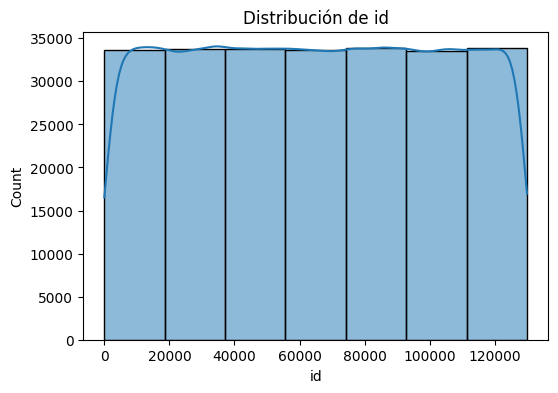

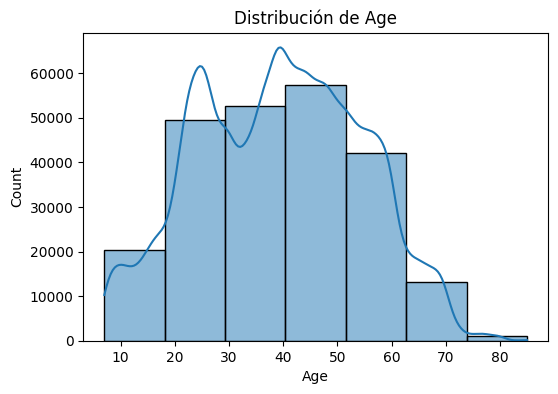

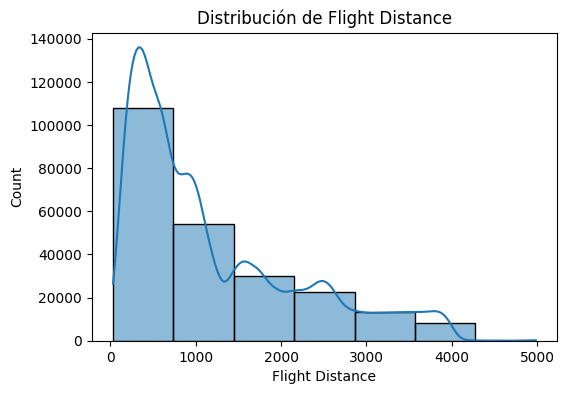

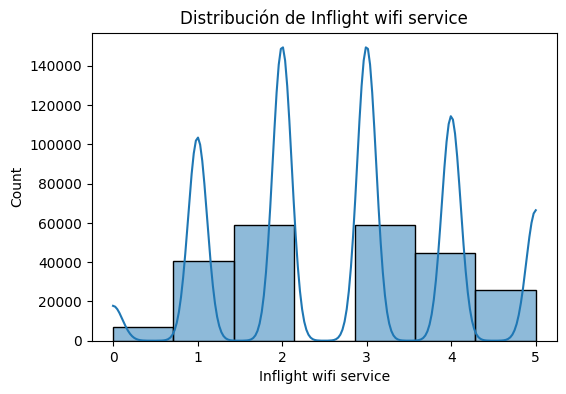

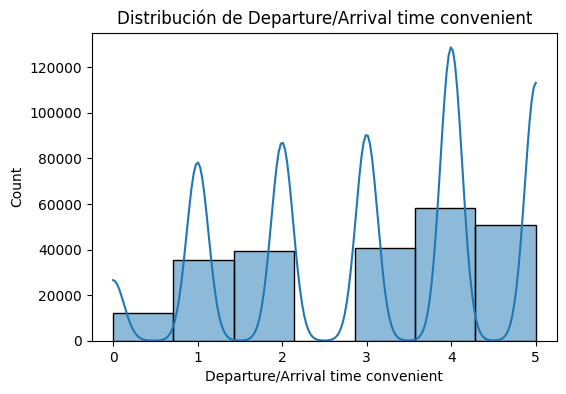

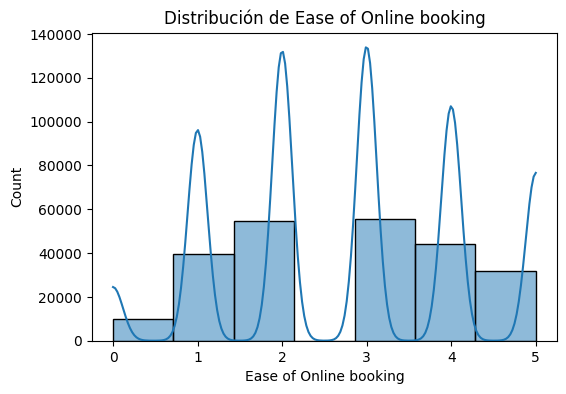

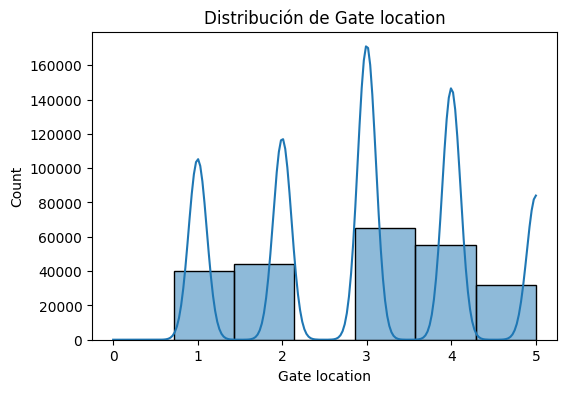

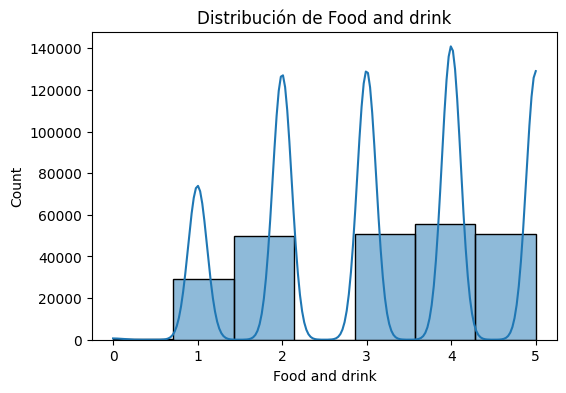

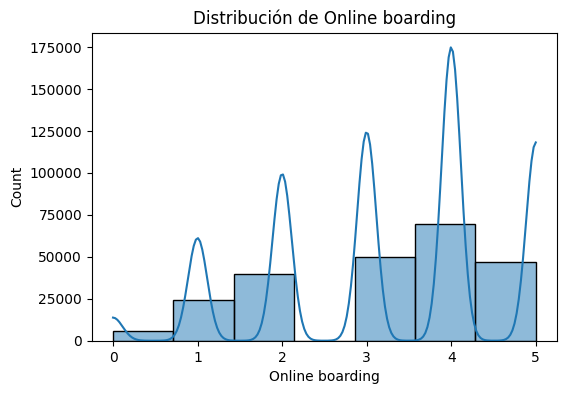

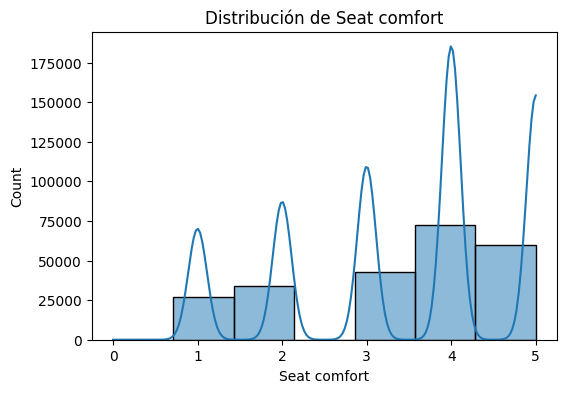

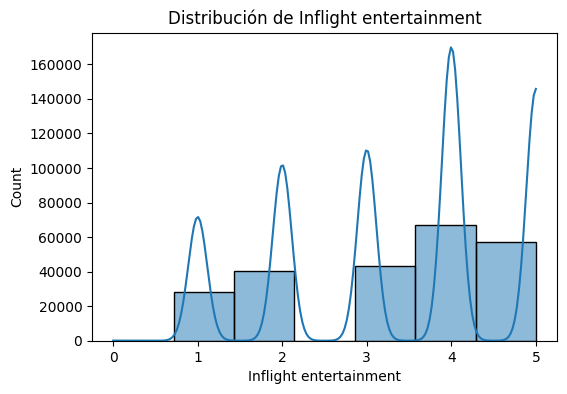

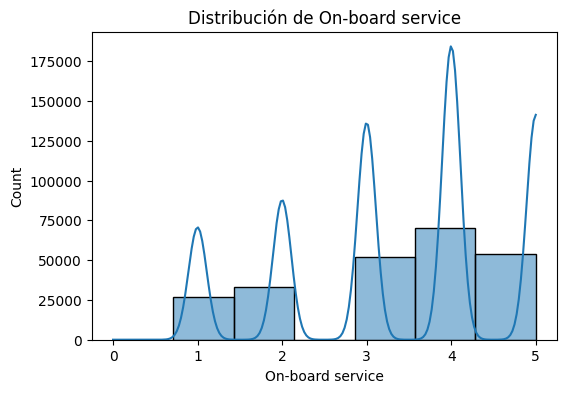

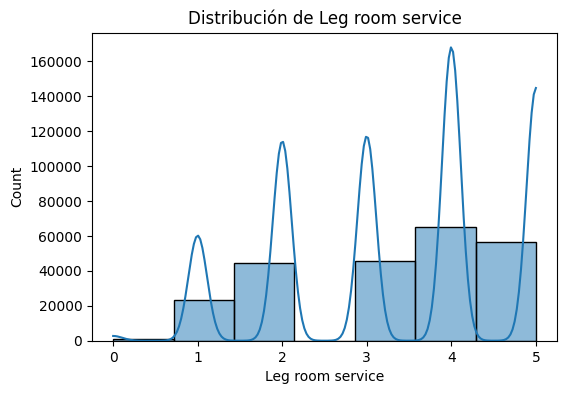

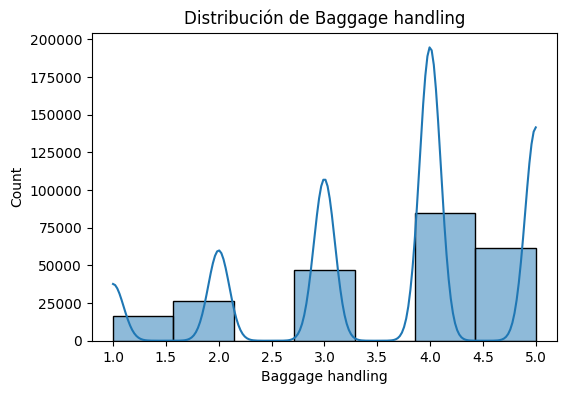

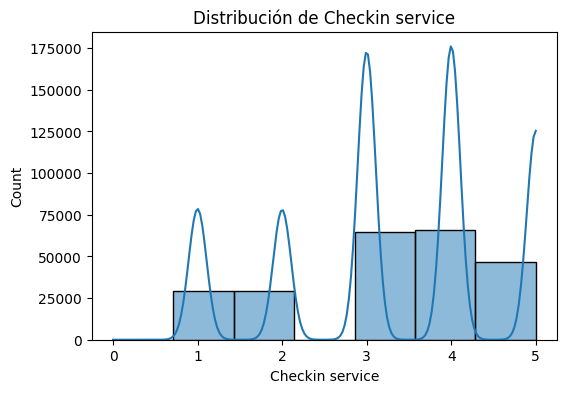

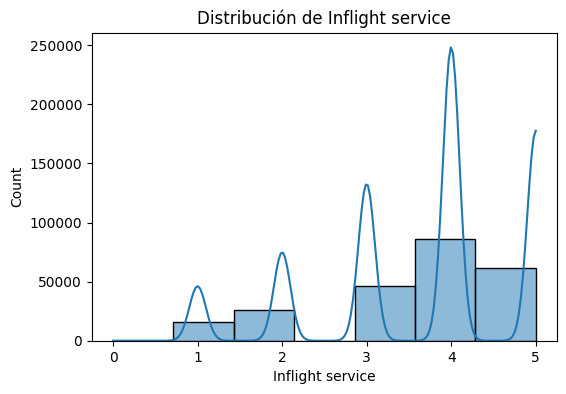

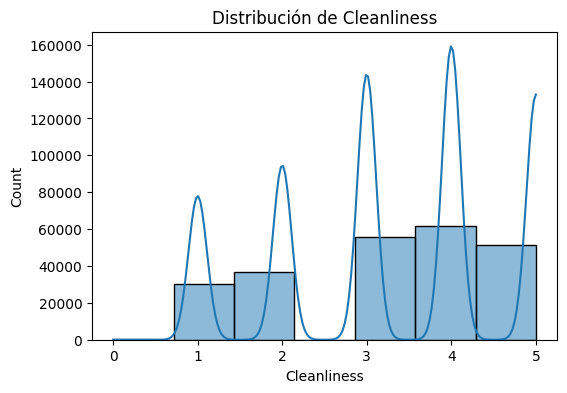

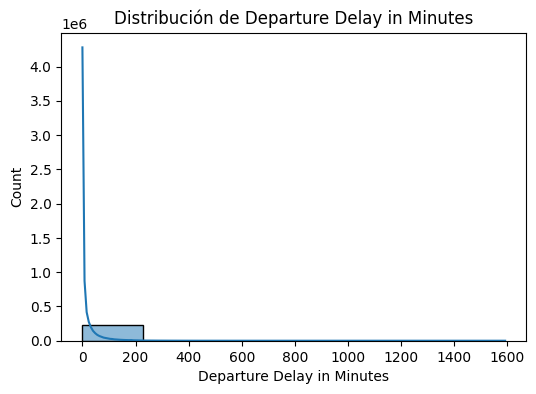

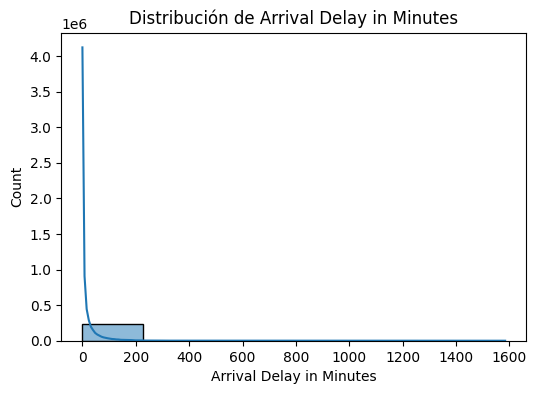

In [94]:
# 2. Visualización de distribuciones
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_num[col], kde=True, bins=7)
    plt.title(f"Distribución de {col}")
    plt.show()

In [95]:
# 3. Escalamiento de datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=num_cols)

In [96]:
df_scaled

id       Age  Flight Distance  Inflight wifi service  \
0       0.138631 -1.744398        -0.731375               0.204088   
1      -1.599175 -0.951048        -0.956600               0.204088   
2       1.202154 -0.884935        -0.048695              -0.549556   
3      -1.092736 -0.951048        -0.629274              -0.549556   
4       1.449543  1.429002        -0.977621               0.204088   
...          ...       ...              ...                    ...   
236109  0.779023 -1.083273        -0.999643              -0.549556   
236110  0.216682  0.635652         1.157506               0.957732   
236111  0.102687 -0.620485         0.805155              -1.303200   
236112 -0.288289 -1.149385        -0.190837              -1.303200   
236113 -0.064302 -0.818823         0.532884              -1.303200   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                0.616147                0.172639   
1                               -0.695638                0.172639   
2                               -0.695638               -0.542116   
3                                1.272040                1.602150   
4                               -0.039746                0.172639   
...                                   ...                     ...   
236109                          -1.351531               -0.542116   
236110                           0.616147                0.887395   
236111                          -1.351531               -1.256872   
236112                          -1.351531               -1.256872   
236113                          -0.039746                0.172639   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0           -1.547994        1.353144        -0.185359      1.184251   
1            0.016793       -1.657989        -0.185359     -1.851481   
2           -0.765600        1.353144         1.296220      1.184251   
3            1.581580       -0.905206        -0.926148     -1.092548   
4            0.016793        0.600361         1.296220      1.184251   
...               ...             ...              ...           ...   
236109       0.016793       -0.905206        -0.926148     -1.092548   
236110       0.799187       -0.905206         0.555431      1.184251   
236111       0.016793        0.600361        -1.666938      1.184251   
236112       1.581580       -1.657989        -1.666938     -1.851481   
236113       0.016793       -1.657989        -1.666938     -1.851481   

        Inflight entertainment  On-board service  Leg room service  \
0                     1.231112          0.478866         -0.268617   
1                    -1.771840         -1.851066          1.251835   
2                     1.231112          0.478866         -0.268617   
3                    -1.021102         -1.074422          1.251835   
4                    -0.270364         -0.297778          0.491609   
...                        ...               ...               ...   
236109               -1.021102         -0.297778         -1.789068   
236110                1.231112          1.255510          1.251835   
236111                0.480374         -0.297778         -1.028842   
236112               -1.771840          0.478866          1.251835   
236113               -1.771840         -1.851066         -1.789068   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0               0.310842         0.549765          1.156004     1.306143   
1              -0.536117        -1.819844          0.304763    -1.742735   
2               0.310842         0.549765          0.304763     1.306143   
3              -0.536117        -1.819844          0.304763    -0.980516   
4               0.310842        -0.240105         -0.546478    -0.218296   
...                  ...              ...               ...          ...   
236109          0.310842        -1.029974         -0.546478    -0.980516   
236110          1.157801      

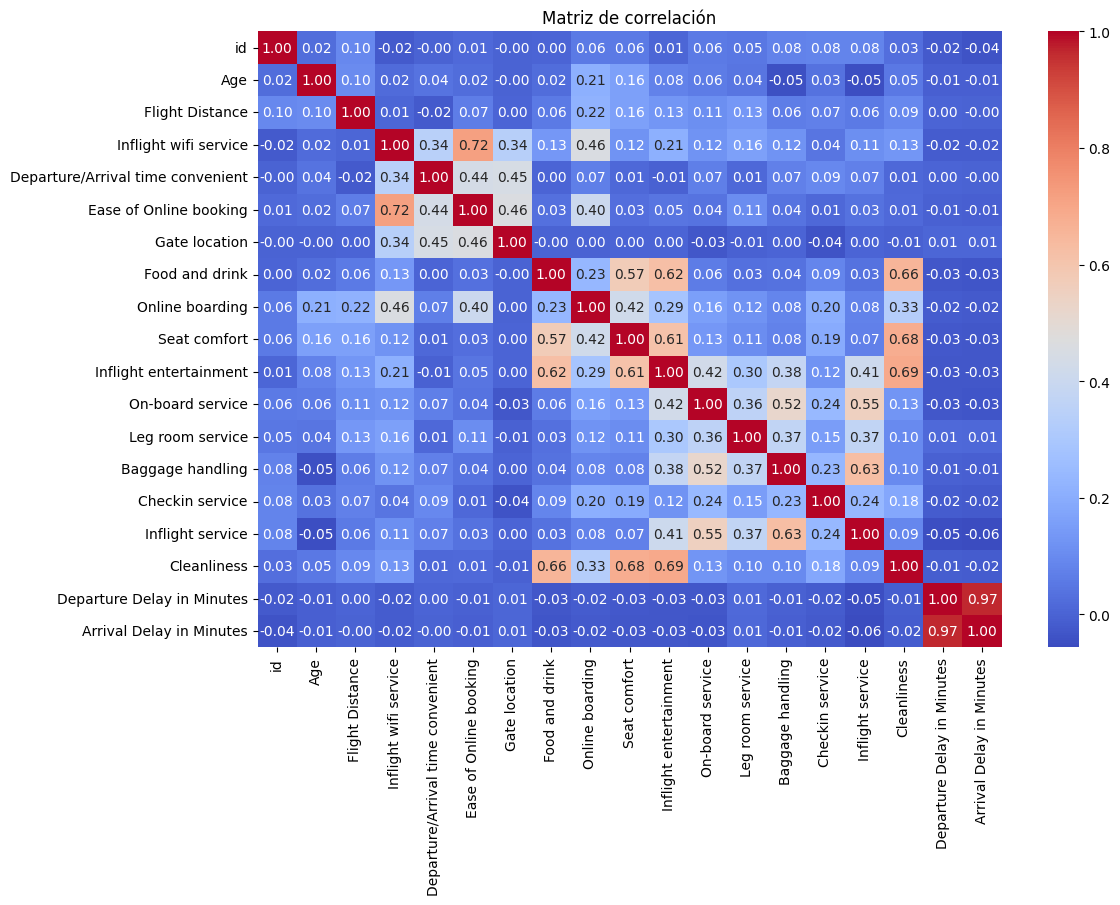

In [97]:
# 4. Correlograma
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [98]:
# 5. Reducción de dimensionalidad
selected_features = [
    "Inflight wifi service",
    "Seat comfort",
    "Food and drink",
    "Arrival Delay in Minutes"
]

df_reduced = df_scaled[selected_features]
df_reduced.head()

Inflight wifi service  Seat comfort  Food and drink  \
0               0.204088      1.184251        1.353144   
1               0.204088     -1.851481       -1.657989   
2              -0.549556      1.184251        1.353144   
3              -0.549556     -1.092548       -0.905206   
4               0.204088      1.184251        0.600361   

   Arrival Delay in Minutes  
0                  0.071988  
1                 -0.238046  
2                 -0.393063  
3                 -0.160538  
4                 -0.393063

In [99]:
df_reduced

Inflight wifi service  Seat comfort  Food and drink  \
0                    0.204088      1.184251        1.353144   
1                    0.204088     -1.851481       -1.657989   
2                   -0.549556      1.184251        1.353144   
3                   -0.549556     -1.092548       -0.905206   
4                    0.204088      1.184251        0.600361   
...                       ...           ...             ...   
236109              -0.549556     -1.092548       -0.905206   
236110               0.957732      1.184251       -0.905206   
236111              -1.303200      1.184251        0.600361   
236112              -1.303200     -1.851481       -1.657989   
236113              -1.303200     -1.851481       -1.657989   

        Arrival Delay in Minutes  
0                       0.071988  
1                      -0.238046  
2                      -0.393063  
3                      -0.160538  
4                      -0.393063  
...                          ...  
236109                 -0.393063  
236110                 -0.393063  
236111                 -0.031357  
236112                 -0.393063  
236113                 -0.393063  

[236114 rows x 4 columns]

1. Al trabajar con el dataset de satisfacción de vuelos, lo primero fue separar las variables numéricas de las categóricas. Esto es fundamental en un contexto no supervisado, ya que los algoritmos de clustering se basan en distancias y similitudes, y las variables categóricas no tienen un orden natural que permita calcular distancias válidas. Si se incluyeran sin transformación, podrían sesgar la segmentación y generar resultados engañosos.

2. En la visualización de las distribuciones se aprecian distintos comportamientos según el tipo de variable. Algunas, como la edad y la distancia de vuelo, presentan distribuciones continuas: Age sigue un patrón cercano a normal, concentrado en adultos entre 30 y 50 años, mientras que Flight Distance tiene una clara asimetría positiva, con la mayoría de vuelos cortos y pocos vuelos de larga distancia. Las variables de satisfacción en servicio (wifi, comida, asiento, entretenimiento, entre otras) son discretas en escala 1 a 5, y tienden a concentrarse en valores intermedios o altos, reflejando evaluaciones frecuentes en los extremos de la escala. Por otra parte, las variables relacionadas con retrasos en minutos (salida y llegada) están fuertemente sesgadas hacia cero, con pocos valores atípicos muy grandes que generan colas largas. Este análisis de distribuciones muestra la diversidad de escalas y rangos presentes en el dataset.

3. A partir de lo anterior, se justifica la necesidad de escalar los datos. Si se aplicaran algoritmos de clustering sin normalizar, variables como Flight Distance (que puede alcanzar miles de kilómetros) o los Delays dominarían la distancia euclidiana, relegando el efecto de variables en escalas pequeñas como las de satisfacción (1 a 5). Con el uso de StandardScaler todas las variables quedan con media cero y varianza unitaria, garantizando que cada dimensión aporte de manera balanceada al análisis no supervisado.

4. El correlograma permitió observar las relaciones internas entre las variables. Se identificó, por ejemplo, una alta correlación entre Departure Delay in Minutes y Arrival Delay in Minutes, lo cual era esperable porque los retrasos de salida suelen propagarse a la llegada. Asimismo, varias variables de satisfacción mostraron correlaciones moderadas, como Seat comfort, On-board service y Leg room service, reflejando que la percepción de comodidad tiende a estar asociada en distintas dimensiones del viaje. En contraste, variables como Age y Flight Distance mostraron correlaciones muy bajas con el resto, aportando información distinta.

5. Con base en estos resultados, se decidió reducir la dimensionalidad a cuatro variables representativas que abarcan distintas dimensiones de la experiencia de vuelo. Una posible selección incluye: Inflight wifi service, como indicador de servicios digitales; Seat comfort, representando la comodidad del pasajero; Food and drink, como variable del servicio a bordo; y Arrival Delay in Minutes, que refleja la puntualidad operacional. Estas cuatro variables resumen de manera balanceada aspectos de servicio, comodidad y desempeño del vuelo. Se descartaron variables redundantes como Departure Delay (por su alta correlación con Arrival Delay) y otras de satisfacción muy similares entre sí (por ejemplo, Checkin service o On-board service), con el fin de evitar duplicación de información en el análisis.

## 3. Preprocesamiento 🎭. [10 puntos]

<center>
<img src="https://media.tenor.com/R_WseIIwQ8QAAAAM/beavis-computer.gif" width=400>

Tras quedar satisfecho con los resultados presentados en el punto 2, el dueño de la empresa ha solicitado que se preprocesen los datos mediante un `pipeline`. Es crucial que este proceso tenga en cuenta las observaciones derivadas de los análisis anteriores. Adicionalmente, ha expresado su interés en visualizar el conjunto de datos en un gráfico de dos o tres dimensiones.

Basándose en los análisis realizados anteriormente:
1. Cree un `pipeline` que incluya PCA, utilizando las consideraciones mencionadas previamente para proyectar los datos a dos dimensiones. [4 puntos]
2. Grafique los resultados obtenidos y comente lo visualizado. [6 puntos]

**Respuestas:**

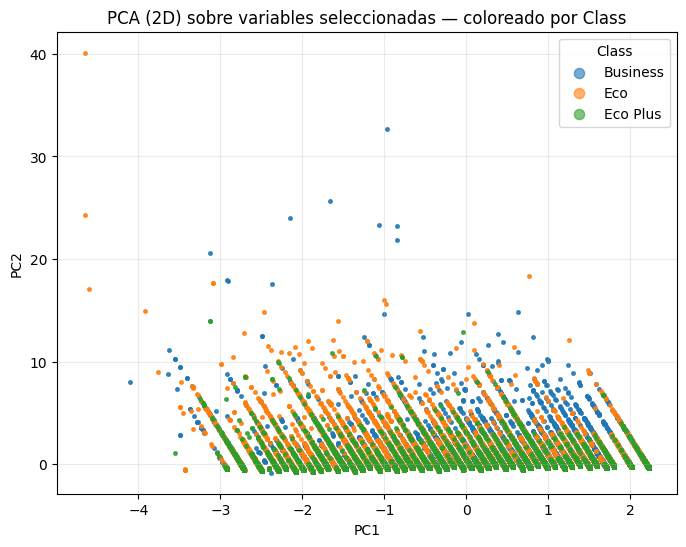

Varianza explicada por PC1 y PC2: 40.76% + 24.92% = 65.67%


In [105]:
# ========= PARTE 3: PIPELINE + PCA (2D) =========
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ------------------------------------------------------------------
# 0) Cargar datos y seleccionar solo NUMÉRICAS (por si no está en memoria)
# ------------------------------------------------------------------
df = pd.read_parquet("aerolineas_lucer.parquet").reset_index(drop=True)
df_num = df.select_dtypes(include=["int64", "float64"])

# ------------------------------------------------------------------
# 1) Variables seleccionadas (parte 2)
# ------------------------------------------------------------------
selected_features = [
    "Inflight wifi service",
    "Seat comfort",
    "Food and drink",
    "Arrival Delay in Minutes"
]
X = df_num[selected_features].copy()

# ------------------------------------------------------------------
# 2) Pipeline: imputar -> escalar -> PCA(2)
#    (el escalado va dentro del pipeline)
# ------------------------------------------------------------------
pca2_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  StandardScaler()),
    ("pca",     PCA(n_components=2, random_state=0))
])

X_pca2 = pca2_pipe.fit_transform(X)

# DataFrame con PCs + etiquetas para colorear (asignación por posición)
pca2_df = pd.DataFrame(X_pca2, columns=["PC1", "PC2"]).reset_index(drop=True)
assert len(pca2_df) == len(df), "Dimensiones no coinciden"
pca2_df["Class"] = df["Class"].to_numpy()                 # Business / Eco / Eco Plus
pca2_df["Type of Travel"] = df["Type of Travel"].to_numpy()  # Business travel / Personal Travel

# ------------------------------------------------------------------
# 3) Gráfico PCA 2D coloreado por Class
# ------------------------------------------------------------------
plt.figure(figsize=(8,6))
for cls, sub in pca2_df.groupby("Class"):
    plt.scatter(sub["PC1"], sub["PC2"], s=6, alpha=0.6, label=str(cls))
plt.title("PCA (2D) sobre variables seleccionadas — coloreado por Class")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(markerscale=3, title="Class")
plt.grid(True, alpha=0.25)
plt.show()

# ------------------------------------------------------------------
# 4) Varianza explicada (para comentario en el informe)
# ------------------------------------------------------------------
expl = pca2_pipe.named_steps["pca"].explained_variance_ratio_
print(f"Varianza explicada por PC1 y PC2: {expl[0]:.2%} + {expl[1]:.2%} = {expl[:2].sum():.2%}")

	•	El scatter muestra las clases (Business, Eco, Eco Plus) en el espacio de componentes principales.
	•	La varianza explicada que te salió: 40.76% + 24.92% ≈ 65.67% significa que esas dos componentes retienen un 65% de la información original, lo que es bastante aceptable para visualización.
	•	En PCA siempre se pierde algo, pero con >60% para datos sociales/servicio ya puedes hacer interpretaciones.


	•	El PC1 parece capturar un “gradiente de satisfacción general” (porque combina variables como Seat comfort, Food and drink y wifi).
	•	El PC2 retiene variabilidad ligada a casos atípicos de retrasos (Arrival Delay in Minutes).
	•	Las clases no están perfectamente separadas (lo esperable), pero se ven tendencias: Business tiende a concentrarse hacia un rango distinto que Eco, mostrando cierta relación entre clase de vuelo y percepción de servicio.

## 4. Outliers 🚫🙅‍♀️❌🙅‍♂️ [10 puntos]

<center>
<img src="https://joachim-gassen.github.io/images/ani_sim_bad_leverage.gif" width=250>

Con el objetivo de mantener la claridad en su análisis, Don Mathias le ha solicitado entrenar un modelo que identifique pasajeros con comportamientos altamente atípicos.

1. Utilice `IsolationForest` para clasificar las anomalías del dataset (sin aplicar PCA), configurando el modelo para que sólo el 1% de los datos sean considerados anómalos. Asegúrese de integrar esta tarea dentro de un `pipeline`. [3 puntos]

2. Visualice los resultados en el gráfico de dos dimensiones previamente creado. [3 puntos]

3. ¿Cómo evaluaría el rendimiento de su modelo en la detección de anomalías? [4 puntos]

**Respuestas:**

In [101]:
# Escriba su código aquí

## 5. Métricas de Desempeño 🚀 [10 puntos]

<center>
<img src="https://i.imgflip.com/6xz0ij.gif" width=400>

Motivado por incrementar su fortuna, Don Mathias le solicita entrenar un modelo que le permita segmentar a los pasajeros en grupos distintos, con el objetivo de optimizar las diversas campañas de marketing diseñadas por su equipo. Para ello, le se pide realizar las siguientes tareas:

1. Utilizar el modelo **Gaussian Mixture** y explore diferentes configuraciones de número de clústers, específicamente entre 3 y 8. Asegúrese de integrar esta operación dentro de un `pipeline`. [4 puntos]
2. Explique cuál sería el criterio adecuado para seleccionar el número óptimo de clústers. **Justifique de forma estadistica y a traves de gráficos.** [6 puntos]

> **HINT:** Se recomienda investigar sobre los criterios AIC y BIC para esta tarea.

**Respuestas:**

In [102]:
# Escriba su código aquí

## 6. Análisis de resultados 📊 [10 puntos]

<center>
<img src="https://i.pinimg.com/originals/5b/03/4e/5b034e96d84c6c6b57a9a04ca14aac02.gif" width=400>

Una vez identificado el número óptimo de clústers, se le pide realizar lo siguiente:

1. Utilizar la proyección en dos dimensiones para visualizar cada clúster claramente. [2 puntos]

2. ¿Es posible distinguir claramente entre los clústers generados? [2 puntos]

3. Proporcionar una descripción breve de cada clúster utilizando estadísticas descriptivas básicas, como la media y la desviación estándar, para resumir las características de las variables utilizadas en estos algoritmos. [2 puntos]

4. Proceda a visualizar los clústers en tres dimensiones para una perspectiva más detallada. [2 puntos]

5. ¿Cómo afecta esto a sus conclusiones anteriores? [2 puntos]

**Respuestas:**

In [103]:
# Escriba su código aquí

Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>